1/1 [==============================] - 0s 432ms/step


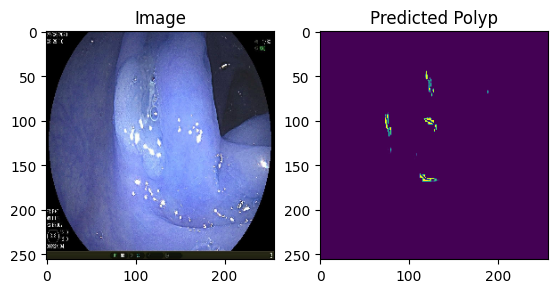

1/1 [==============================] - 0s 22ms/step


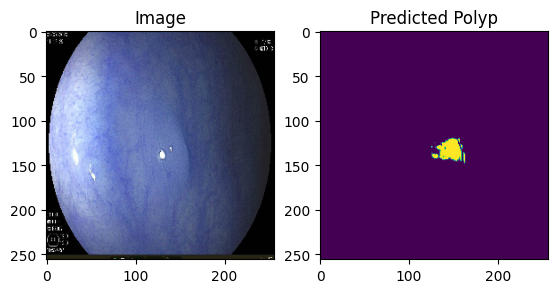

1/1 [==============================] - 0s 20ms/step


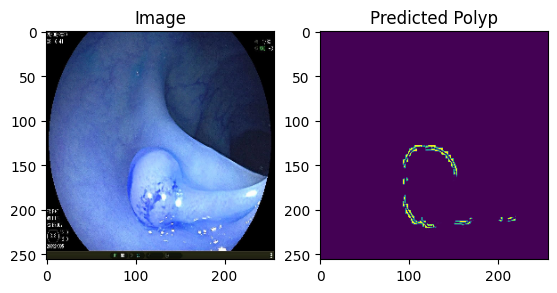

1/1 [==============================] - 0s 17ms/step


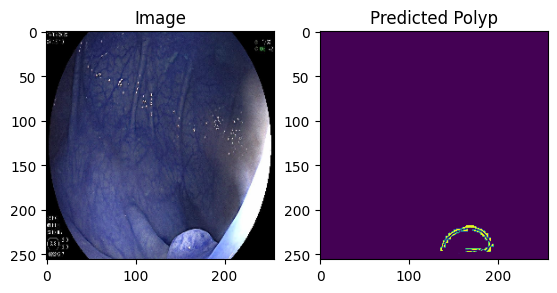

In [6]:
#Test with test data
import matplotlib.pyplot as plt
import os
import random

import tensorflow as tf
import cv2
import numpy as np

from segmentation_models.metrics import iou_score
from segmentation_models import Unet
import segmentation_models as sm


sm.set_framework("tf.keras")
sm.framework()

#Initialize parameters
BACKBONE = "resnet34"
preprocess_input = sm.get_preprocessing(BACKBONE)
batch_size = 16
w, h = 256, 256

#initialize model
opt=tf.keras.optimizers.Adam(0.001)
model= Unet(BACKBONE,encoder_weights = "imagenet",classes = 1,activation="sigmoid",input_shape = (256,256,3),encoder_freeze = True)
loss1 = sm.losses.categorical_focal_dice_loss

model.compile(optimizer=opt,loss=loss1,metrics=[iou_score])

model.load_weights("checkpoint_1.hdf5")

#Test with images in test folder
test_folder = "test/test"
count = 0
num_images = 3

while count <= num_images:
    file = random.choice(os.listdir(test_folder))
    count += 1
    # Read input image
    image_path = os.path.join(test_folder, file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    # Predict segmentation map with trained model

    mask_predict = model.predict(image[np.newaxis, :, :, :])

    plt.figure(figsize=(10, 6))
    plt.subplot(131)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(132)
    plt.title("Predicted Polyp")
    z = mask_predict[0]#[:, :, 0]
    plt.imshow(z)
    plt.show()

In [62]:
#Test with real_video
import matplotlib.pyplot as plt
import os
import random
import time

import tensorflow as tf
import cv2
import numpy as np
import imutils

from segmentation_models.metrics import iou_score
from segmentation_models import Unet
import segmentation_models as sm


sm.set_framework("tf.keras")
sm.framework()

#Initialize parameters
BACKBONE = "resnet34"
preprocess_input = sm.get_preprocessing(BACKBONE)
batch_size = 16
w, h = 256, 256

#initialize model
opt=tf.keras.optimizers.Adam(0.001)
model= Unet(BACKBONE,encoder_weights = "imagenet",classes = 1,activation="sigmoid",input_shape = (256,256,3),encoder_freeze = True)
loss1 = sm.losses.categorical_focal_dice_loss

model.compile(optimizer=opt,loss=loss1,metrics=[iou_score])

model.load_weights("checkpoint_1.hdf5")


In [83]:
#id = 'http://192.168.1.2:4747/video'
id = 'Polyp_1.mp4'
cap = cv2.VideoCapture(id)
cap1 = cv2.VideoCapture('culture.mp4')
rotate = 0
writer= cv2.VideoWriter('Polyp_1_detected.avi', cv2.VideoWriter_fourcc(*'DIVX'), 20, (w,h))

while True:
    start = time.time()
    success, frame = cap.read()
    if success:
        frame = cv2.resize(frame, (256, 256))
        frame1 = cv2.resize(frame1, (w, h))
        # Predict mask with trained model

        mask_predict = model.predict(frame[np.newaxis, :, :, :])
        mask = mask_predict[0]#[:, :, 0]

        img2 = np.zeros_like(frame)
        img2[:, :, 0] = mask[:, :, 0] * 0
        img2[:, :, 1] = mask[:, :, 0] * 255
        img2[:, :, 2] = mask[:, :, 0] * 0

        #Count FPS
        fps = 1 / (time.time() - start)
        print(start)

        #Draw contours
        result = cv2.bitwise_or(frame, img2)

        #Show prediction
        #im = cv2.hconcat([frame, img2, Result])
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(result, "FPS: " + str(int(fps)), (5, 20), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow("Result", result)
        writer.write(result)
        
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cap.release()
writer.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step
1667818816.1559997
1/1 [==============================] - 0s 33ms/step
1667818816.4323614
1/1 [==============================] - 0s 27ms/step
1667818816.509897
1/1 [==============================] - 0s 28ms/step
1667818816.5721884
1/1 [==============================] - 0s 29ms/step
1667818816.6346314
1/1 [==============================] - 0s 27ms/step
1667818816.6960952
1/1 [==============================] - 0s 22ms/step
1667818816.7588904
1/1 [==============================] - 0s 29ms/step
1667818816.821703
1/1 [==============================] - 0s 25ms/step
1667818816.8841128
1/1 [==============================] - 0s 26ms/step
1667818816.946743
1/1 [==============================] - 0s 26ms/step
1667818817.0087757
1/1 [==============================] - 0s 26ms/step
1667818817.0719347
1/1 [==============================] - 0s 28ms/step
1667818817.13294
1/1 [==============================] - 0s 25ms/step
1667818817.1955433
1/1 [======